# Prepair data

In [1]:
#install
!pip install backtesting
!pip install mplfinance
!pip install -q dtreeviz
%config InlineBackend.figure_format = 'retina' # Make visualizations look good
# %config InlineBackend.figure_format = 'svg'
%matplotlib inline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.5/175.5 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for backtesting: filename=Backtesting-0.3.3-py3-none-any.whl size=173804 sha256=e2148d76a15ecafda163eeed85ead2306072208fea98597899f9a62b22d97521
  Stored in directory: /root/.cache/pip/wheels/e2/30/7f/19cbe31987c6ebdb47f1f510343249066711609e3da2d57176
Successfully built backtesting
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 5.7 MB/s eta 0:00:00


In [3]:
#prepair data
!gdown https://drive.google.com/uc?id=1PukTR0oD53IOiovrV8XncSqkfa2Jj-f3

Downloading...
From: https://drive.google.com/uc?id=1PukTR0oD53IOiovrV8XncSqkfa2Jj-f3
To: /content/tcb_data_feature.csv
100% 1.16M/1.16M [00:00<00:00, 9.45MB/s]


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression #
import statsmodels.api as sm
import mplfinance as mplf
import warnings
warnings.filterwarnings('ignore')

# plt.rcParams['font.family'] = 'sans-serif'
# plt.rcParams['font.sans-serif'] = 'DejaVu Sans'

In [5]:
data_path = "/content/tcb_data_feature.csv"

In [6]:
tcb_data_feature = pd.read_csv(data_path)
tcb_data_feature = tcb_data_feature.dropna()
tcb_data_feature['TradingDate'] = pd.to_datetime(tcb_data_feature['TradingDate'])
tcb_data_feature.set_index('TradingDate', inplace=True)

In [7]:
tcb_data_feature.tail()

,Open,High,Low,Close,Volume,close_open_diff,high_close_diff,low_close_diff,high_open_diff,low_open_diff,...,bollinger_lband_20,bollinger_hband_20,ema_12,ema_26,close_t1,close_t2,close_t3,open_t1,open_t2,open_t3
TradingDate,,,,,,,,,,,,,,,,,,,,,
2023-06-14 09:00:00+07:00,33.00,33.45,32.55,32.60,5374800,-0.40,0.85,-0.05,0.45,-0.45,...,28.647709,33.547291,31.921735,31.058135,32.65,32.55,32.10,32.60,32.65,32.55
2023-06-15 09:00:00+07:00,32.60,32.90,32.40,32.65,3863700,0.05,0.25,-0.25,0.30,-0.20,...,28.812378,33.687622,32.033775,31.176051,32.55,32.10,32.15,32.65,32.55,32.20
2023-06-16 09:00:00+07:00,32.65,33.45,32.50,32.55,6928400,-0.10,0.90,-0.05,0.80,-0.15,...,29.001209,33.783791,32.113195,31.277825,32.10,32.15,32.50,32.55,32.20,32.15
2023-06-19 09:00:00+07:00,32.55,32.55,31.95,32.10,3674300,-0.45,0.45,-0.15,0.00,-0.60,...,29.099006,33.845994,32.111165,31.338727,32.15,32.50,32.60,32.20,32.15,32.90
2023-06-20 09:00:00+07:00,32.20,32.25,31.95,32.15,2084400,-0.05,0.10,-0.20,0.05,-0.25,...,29.229932,33.895068,32.117139,31.398821,32.50,32.60,32.90,32.15,32.90,32.65


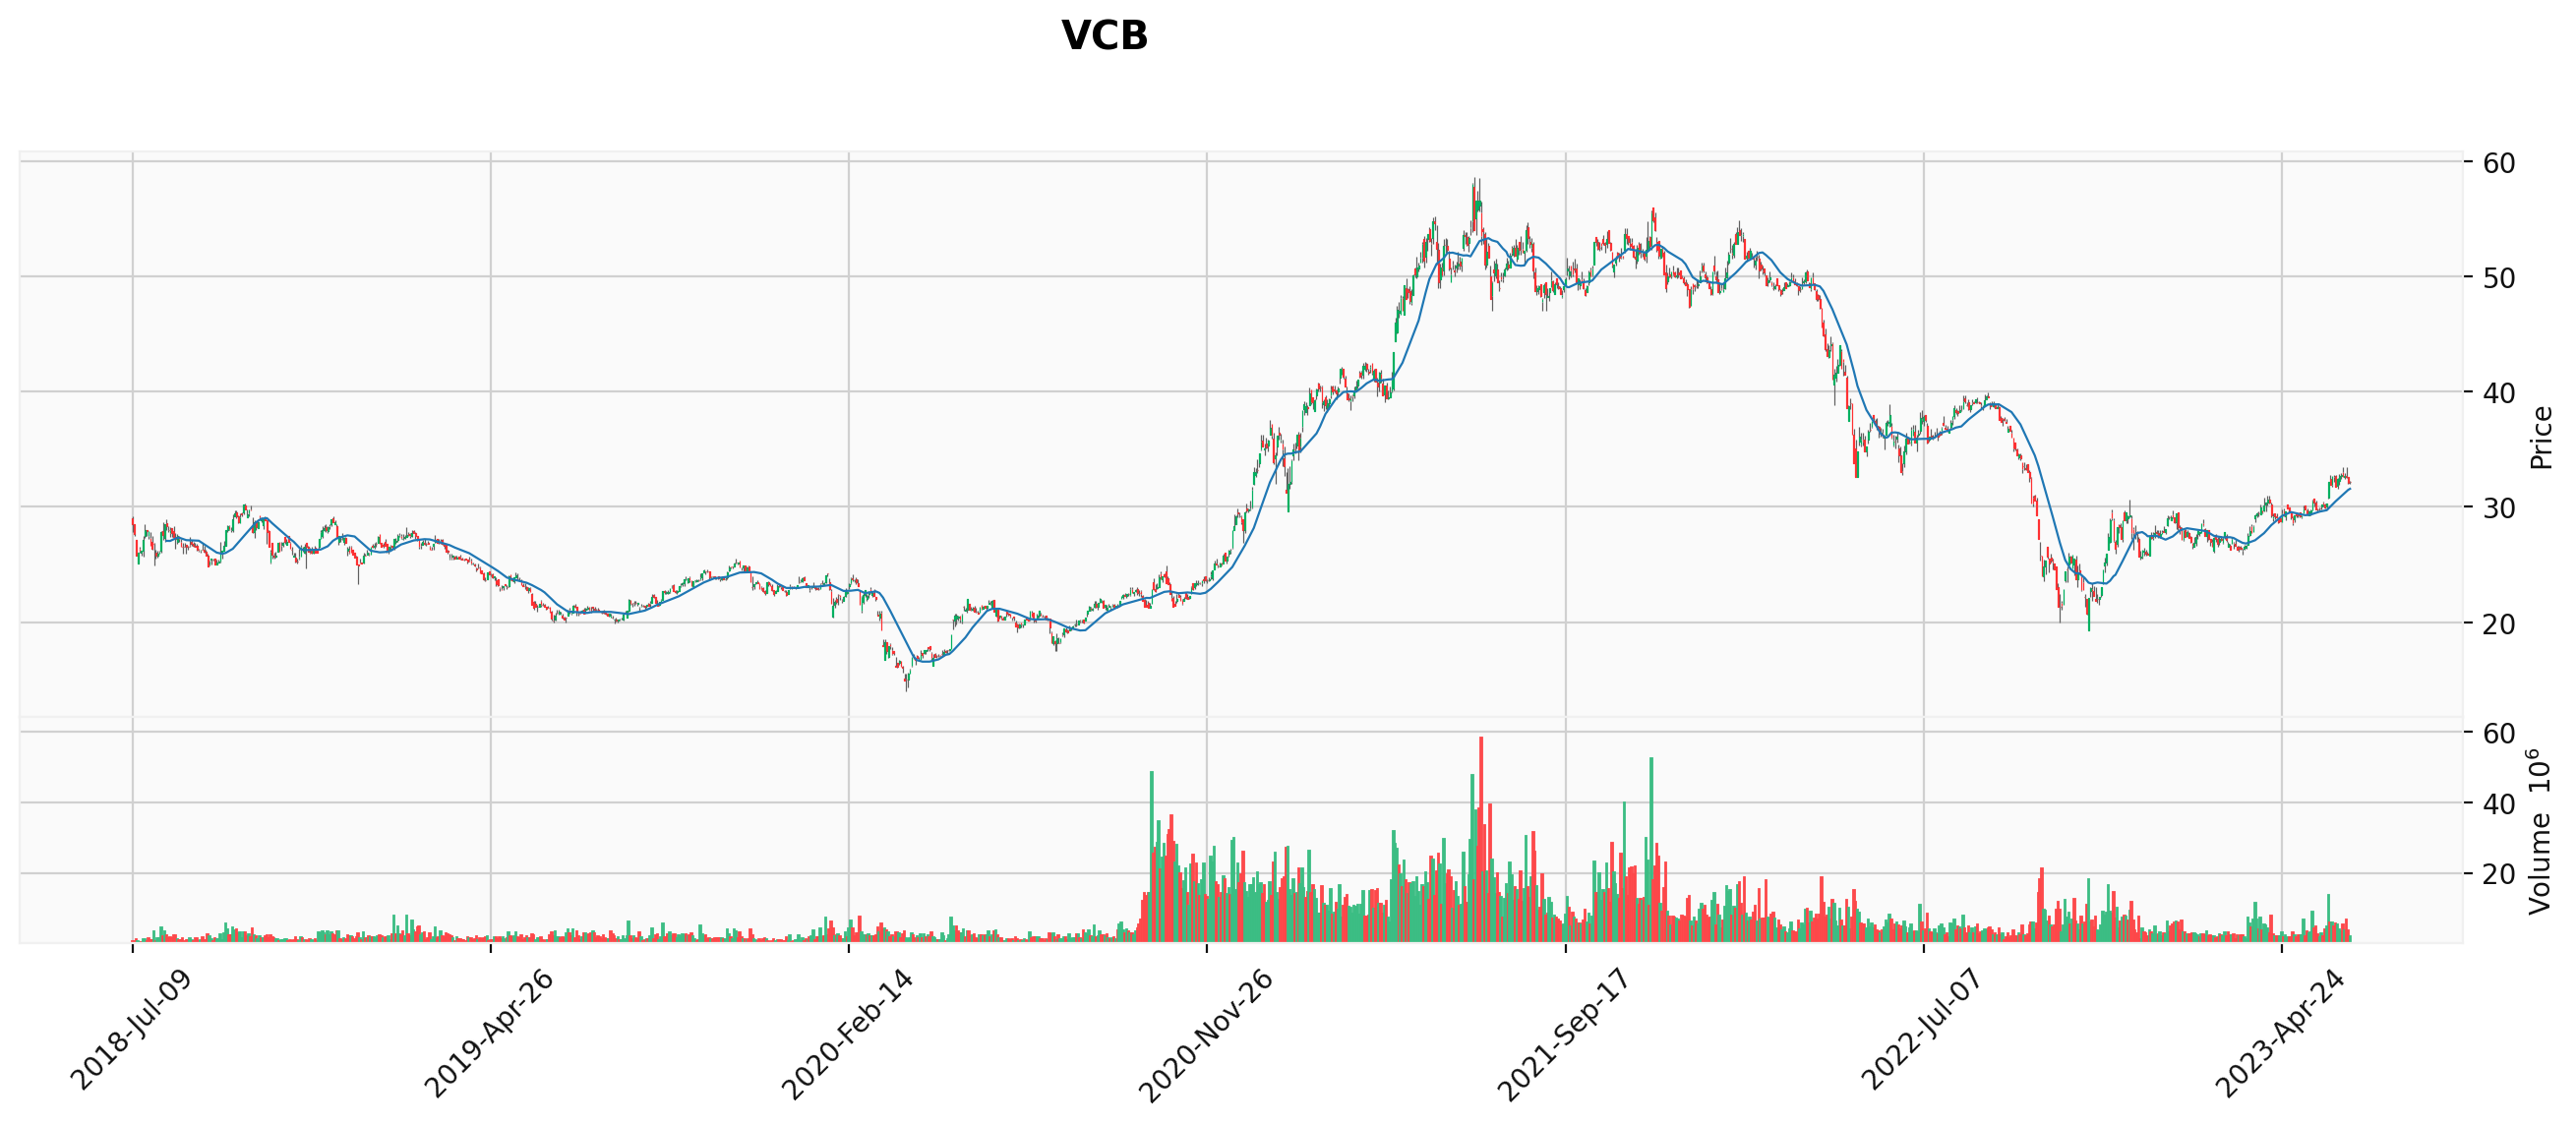

In [8]:
import mplfinance as mplf
mplf.plot(tcb_data_feature,figratio=(60,20),
          title='VCB',
          type='candle',
          mav=(20),volume=True,
          style="yahoo")
mplf.show()

In [ ]:
# y = 2x
# x =1 y = 2
# x = 3 y = 6
# ....
# x = 100 y = 200


# 0< x < 3 y = 2 ??????
# 3 < x < 5 -> y = 8 ??? predict x = 4.5 -> y = 8

In [9]:
tcb_data_feature.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'close_open_diff',
       'high_close_diff', 'low_close_diff', 'high_open_diff', 'low_open_diff',
       'high_low_diff', 'open_diff_pct_p1', 'open_diff_pct_p2',
       'open_diff_pct_p3', 'open_diff_pct_p4', 'open_diff_pct_p5',
       'open_diff_pct_p7', 'close_p1', 'close_p2', 'close_p3', 'close_p4',
       'close_p5', 'close_p7', 'close_diff_p1', 'close_diff_p2',
       'close_diff_p3', 'close_diff_p4', 'close_diff_p5', 'close_diff_p7',
       'close_diff_pct_p1', 'close_diff_pct_p2', 'close_diff_pct_p3',
       'close_diff_pct_p4', 'close_diff_pct_p5', 'close_diff_pct_p7',
       'volume_p1', 'volume_p2', 'volume_p3', 'volume_p4', 'volume_p5',
       'volume_p7', 'volume_diff_p1', 'volume_diff_p2', 'volume_diff_p3',
       'volume_diff_p4', 'volume_diff_p5', 'volume_diff_p7',
       'volume_diff_pct_p1', 'volume_diff_pct_p2', 'volume_diff_pct_p3',
       'volume_diff_pct_p4', 'volume_diff_pct_p5', 'volume_diff_pct_p7',
       'on_bal

In [10]:
# target
tcb_data_feature['open_t3_t1_diff_pct'] = (tcb_data_feature['open_t3'] / tcb_data_feature['open_t1'] -1) * 100

# feature
tcb_data_feature['month'] = tcb_data_feature.index.month
tcb_data_feature['day_of_week'] = tcb_data_feature.index.dayofweek

tcb_data_feature['close_open_diff_pct'] = (tcb_data_feature['Close'] / tcb_data_feature['Open'] - 1) * 100
tcb_data_feature['high_close_diff_pct'] = (tcb_data_feature['High'] / tcb_data_feature['Close'] - 1) * 100
tcb_data_feature['low_close_diff_pct'] = (tcb_data_feature['Low'] / tcb_data_feature['Close'] - 1) * 100
tcb_data_feature['high_open_diff_pct'] = (tcb_data_feature['High'] / tcb_data_feature['Open'] - 1) * 100
tcb_data_feature['low_open_diff_pct'] = (tcb_data_feature['Low'] / tcb_data_feature['Open'] - 1) * 100
tcb_data_feature['high_low_diff_pct'] = (tcb_data_feature['High'] / tcb_data_feature['Low'] - 1) * 100

tcb_data_feature['on_balance_volume_diff_pct'] = (tcb_data_feature['on_balance_volume'] / tcb_data_feature['Volume']) * 100
tcb_data_feature['close_bollinger_mavg_20_diff_pct'] = (tcb_data_feature['Close'] / tcb_data_feature['bollinger_mavg_20']) * 100
tcb_data_feature['close_bollinger_lband_20_diff_pct'] = (tcb_data_feature['Close'] / tcb_data_feature['bollinger_lband_20']) * 100
tcb_data_feature['close_bollinger_hband_20_diff_pct'] = (tcb_data_feature['Close'] / tcb_data_feature['bollinger_hband_20']) * 100

tcb_data_feature['close_ema_12_diff_pct'] = (tcb_data_feature['Close'] / tcb_data_feature['ema_12']) * 100
tcb_data_feature['close_ema_26_diff_pct'] = (tcb_data_feature['Close'] / tcb_data_feature['ema_26']) * 100

In [11]:
tcb_data_feature.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'close_open_diff',
       'high_close_diff', 'low_close_diff', 'high_open_diff', 'low_open_diff',
       'high_low_diff', 'open_diff_pct_p1', 'open_diff_pct_p2',
       'open_diff_pct_p3', 'open_diff_pct_p4', 'open_diff_pct_p5',
       'open_diff_pct_p7', 'close_p1', 'close_p2', 'close_p3', 'close_p4',
       'close_p5', 'close_p7', 'close_diff_p1', 'close_diff_p2',
       'close_diff_p3', 'close_diff_p4', 'close_diff_p5', 'close_diff_p7',
       'close_diff_pct_p1', 'close_diff_pct_p2', 'close_diff_pct_p3',
       'close_diff_pct_p4', 'close_diff_pct_p5', 'close_diff_pct_p7',
       'volume_p1', 'volume_p2', 'volume_p3', 'volume_p4', 'volume_p5',
       'volume_p7', 'volume_diff_p1', 'volume_diff_p2', 'volume_diff_p3',
       'volume_diff_p4', 'volume_diff_p5', 'volume_diff_p7',
       'volume_diff_pct_p1', 'volume_diff_pct_p2', 'volume_diff_pct_p3',
       'volume_diff_pct_p4', 'volume_diff_pct_p5', 'volume_diff_pct_p7',
       'on_bal

In [12]:
tcb_data_feature.tail()

,Open,High,Low,Close,Volume,close_open_diff,high_close_diff,low_close_diff,high_open_diff,low_open_diff,...,low_close_diff_pct,high_open_diff_pct,low_open_diff_pct,high_low_diff_pct,on_balance_volume_diff_pct,close_bollinger_mavg_20_diff_pct,close_bollinger_lband_20_diff_pct,close_bollinger_hband_20_diff_pct,close_ema_12_diff_pct,close_ema_26_diff_pct
TradingDate,,,,,,,,,,,,,,,,,,,,,
2023-06-14 09:00:00+07:00,33.00,33.45,32.55,32.60,5374800,-0.40,0.85,-0.05,0.45,-0.45,...,-0.153374,1.363636,-1.363636,2.764977,22682.637866,104.831578,113.796184,97.176252,102.124776,104.964447
2023-06-15 09:00:00+07:00,32.60,32.90,32.40,32.65,3863700,0.05,0.25,-0.25,0.30,-0.20,...,-0.765697,0.920245,-0.613497,1.543210,31653.858219,104.480000,113.319351,96.919872,101.923671,104.727824
2023-06-16 09:00:00+07:00,32.65,33.45,32.50,32.55,6928400,-0.10,0.90,-0.05,0.80,-0.15,...,-0.153610,2.450230,-0.459418,2.923077,17552.129207,103.687186,112.236702,96.347978,101.360205,104.067338
2023-06-19 09:00:00+07:00,32.55,32.55,31.95,32.10,3674300,-0.45,0.45,-0.15,0.00,-0.60,...,-0.467290,0.000000,-1.843318,1.877934,32996.963231,101.993804,110.313047,94.841356,99.965231,102.429177
2023-06-20 09:00:00+07:00,32.20,32.25,31.95,32.15,2084400,-0.05,0.10,-0.20,0.05,-0.25,...,-0.622084,0.155280,-0.776398,0.938967,58265.775283,101.861386,109.989994,94.851557,100.102315,102.392379


In [13]:
tcb_data_feature.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1239 entries, 2018-07-09 07:00:00+07:00 to 2023-06-20 09:00:00+07:00
Data columns (total 82 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Open                               1239 non-null   float64
 1   High                               1239 non-null   float64
 2   Low                                1239 non-null   float64
 3   Close                              1239 non-null   float64
 4   Volume                             1239 non-null   int64  
 5   close_open_diff                    1239 non-null   float64
 6   high_close_diff                    1239 non-null   float64
 7   low_close_diff                     1239 non-null   float64
 8   high_open_diff                     1239 non-null   float64
 9   low_open_diff                      1239 non-null   float64
 10  high_low_diff                      1239 non-null   float64
 11  open_dif

In [14]:
tcb_data_feature = tcb_data_feature.dropna()

## Split data

In [17]:
tcb_data_feature_train = tcb_data_feature[:'2022-01-01']
tcb_data_feature_validate = tcb_data_feature['2022-01-01':'2022-09-01'] #hyper tun
tcb_data_feature_test = tcb_data_feature['2022-09-01':]

In [18]:
print(tcb_data_feature_train.shape)
print(tcb_data_feature_validate.shape)
print(tcb_data_feature_test.shape)

(876, 82)
(164, 82)
(199, 82)


In [20]:
features = ['day_of_week', 'month', 'open_diff_pct_p1', 'open_diff_pct_p2', 'open_diff_pct_p3','open_diff_pct_p7',
       'close_diff_pct_p1', 'close_diff_pct_p2', 'close_diff_pct_p3',
       'close_diff_pct_p7', 'volume_diff_pct_p1', 'volume_diff_pct_p2', 'volume_diff_pct_p3',
       'volume_diff_pct_p7', 'rsi_window_14', 'rsi_window_7', 'close_open_diff_pct', 'high_close_diff_pct', 'low_close_diff_pct',
       'high_open_diff_pct', 'low_open_diff_pct', 'high_low_diff_pct',
       'on_balance_volume_diff_pct', 'close_bollinger_mavg_20_diff_pct',
       'close_bollinger_lband_20_diff_pct', 'close_bollinger_hband_20_diff_pct',
       'close_ema_12_diff_pct', 'close_ema_26_diff_pct']

In [21]:
#train
X_train = tcb_data_feature_train[features]

y_train = tcb_data_feature_train['open_t3_t1_diff_pct']

In [22]:
#validate
X_validate = tcb_data_feature_validate[features]

y_validate = tcb_data_feature_validate['open_t3_t1_diff_pct']

In [23]:
#test
X_test = tcb_data_feature_test[features]

y_test = tcb_data_feature_test['open_t3_t1_diff_pct']

# Modeling/ Decision tree

## Default tree

In [24]:
y_train.shape

(876,)

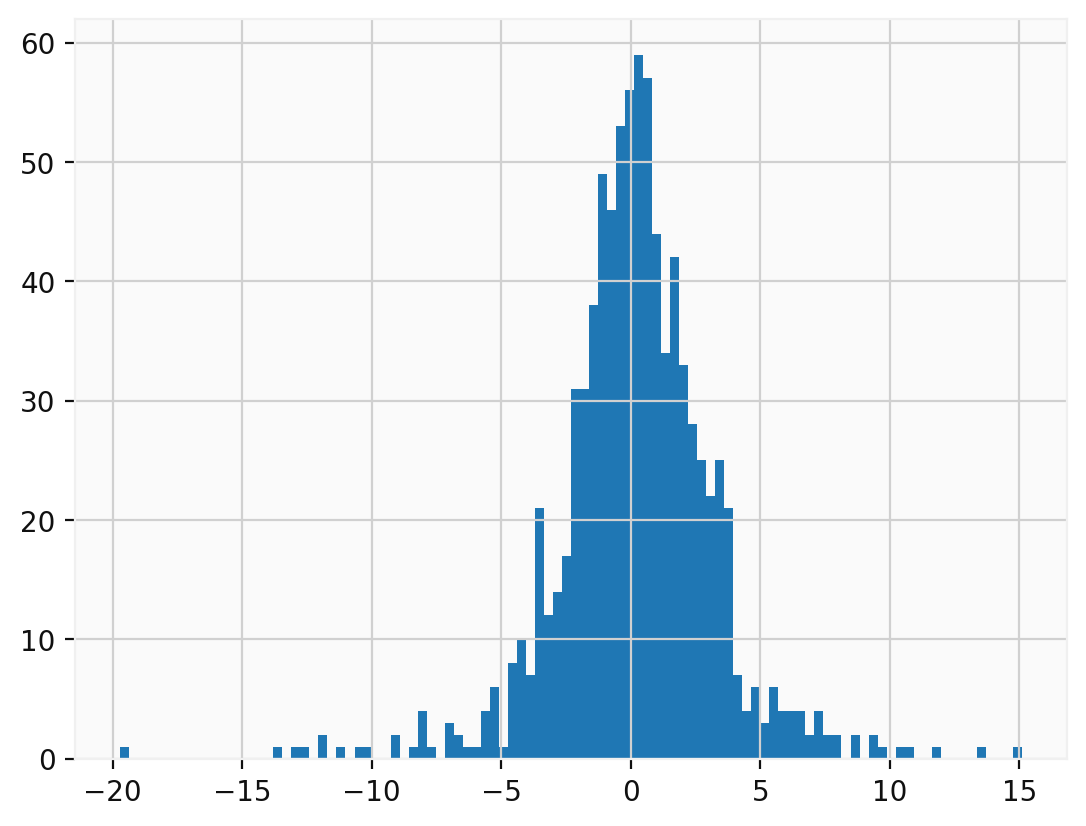

In [25]:
plt.hist(y_train, bins=100)
plt.show()

In [27]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
random_state = 12

In [62]:
regressor = DecisionTreeRegressor(max_depth=5, min_samples_leaf=5, min_samples_split=11,
                      random_state=12, splitter='random')
regressor.__dict__

{'criterion': 'squared_error',
 'splitter': 'random',
 'max_depth': 5,
 'min_samples_split': 11,
 'min_samples_leaf': 5,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': 12,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0}

In [63]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=5, min_samples_split=11,
                      random_state=12, splitter='random')

In [64]:
# text_representation
text_representation = tree.export_text(regressor, feature_names=list(X_train.columns))
print(text_representation)

|--- open_diff_pct_p7 <= 0.13
|   |--- high_low_diff_pct <= 7.71
|   |   |--- close_diff_pct_p2 <= -0.09
|   |   |   |--- value: [4.30]
|   |   |--- close_diff_pct_p2 >  -0.09
|   |   |   |--- month <= 4.19
|   |   |   |   |--- low_open_diff_pct <= -1.43
|   |   |   |   |   |--- value: [-1.26]
|   |   |   |   |--- low_open_diff_pct >  -1.43
|   |   |   |   |   |--- value: [-0.03]
|   |   |   |--- month >  4.19
|   |   |   |   |--- close_bollinger_lband_20_diff_pct <= 122.97
|   |   |   |   |   |--- value: [0.13]
|   |   |   |   |--- close_bollinger_lband_20_diff_pct >  122.97
|   |   |   |   |   |--- value: [1.67]
|   |--- high_low_diff_pct >  7.71
|   |   |--- month <= 4.16
|   |   |   |--- value: [4.40]
|   |   |--- month >  4.16
|   |   |   |--- value: [1.08]
|--- open_diff_pct_p7 >  0.13
|   |--- close_bollinger_lband_20_diff_pct <= 121.74
|   |   |--- value: [4.62]
|   |--- close_bollinger_lband_20_diff_pct >  121.74
|   |   |--- rsi_window_7 <= 91.83
|   |   |   |--- high_open_di

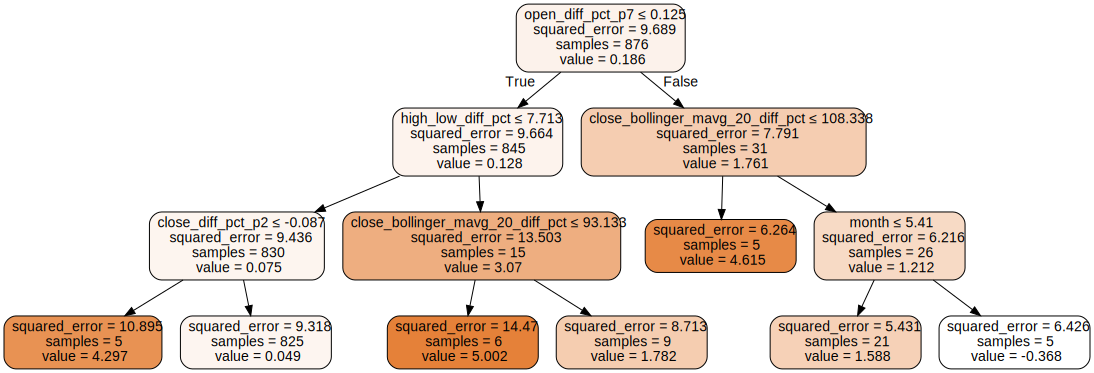

In [43]:
import graphviz
dot_data = tree.export_graphviz(regressor, out_file=None,
                      feature_names=list(X_train.columns),
                      class_names=['0', '1'],
                      filled=True, rounded=True,
                      special_characters=True)
graph = graphviz.Source(dot_data)
graph.render(filename='tree.svg')
graph

In [44]:
import warnings
import dtreeviz

# Ignore warnings
warnings.filterwarnings("ignore")
viz_rmodel = dtreeviz.model(model=regressor,
                            X_train=X_train,
                            y_train=y_train,
                            feature_names=list(X_train.columns),
                            target_name='output',
                            )

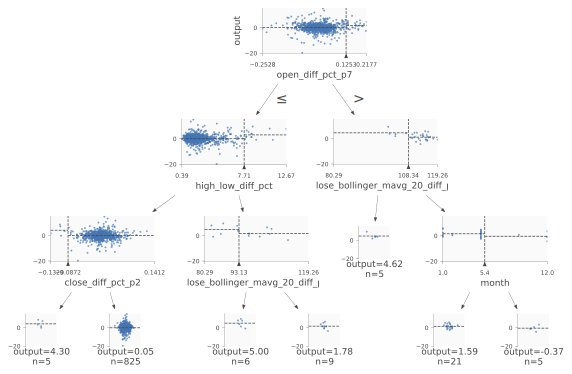

In [45]:
tree_dview = viz_rmodel.view(fontname=plt.rcParams['font.family'])
tree_dview.save("dtreeviz.svg")
tree_dview

day_of_week                            0.000000
month                                  7.000000
open_diff_pct_p1                       0.035714
open_diff_pct_p2                       0.005199
open_diff_pct_p3                       0.080746
open_diff_pct_p7                      -0.064515
close_diff_pct_p1                     -0.010417
close_diff_pct_p2                      0.012433
close_diff_pct_p3                      0.055557
close_diff_pct_p7                     -0.072667
volume_diff_pct_p1                    -0.456292
volume_diff_pct_p2                    -0.601351
volume_diff_pct_p3                    -0.427525
volume_diff_pct_p7                    -0.521509
rsi_window_14                         33.905813
rsi_window_7                          35.263137
close_open_diff_pct                   -1.724138
high_close_diff_pct                    2.456140
low_close_diff_pct                    -2.280702
high_open_diff_pct                     0.689655
low_open_diff_pct                     -3

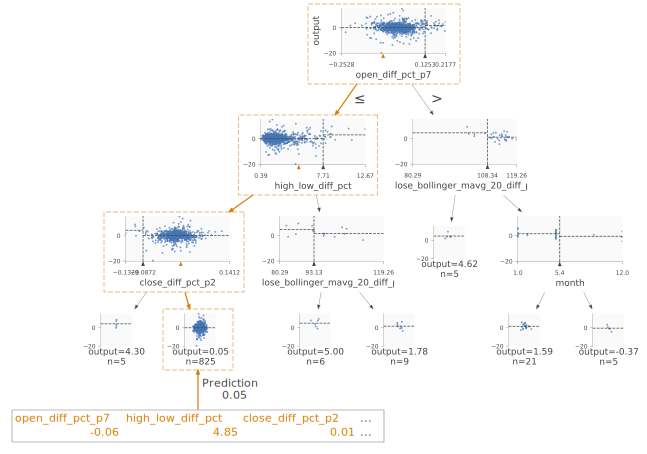

In [46]:
x = X_train.iloc[0]
print(x)
viz_rmodel.view(x=x, fontname=plt.rcParams['font.family'])

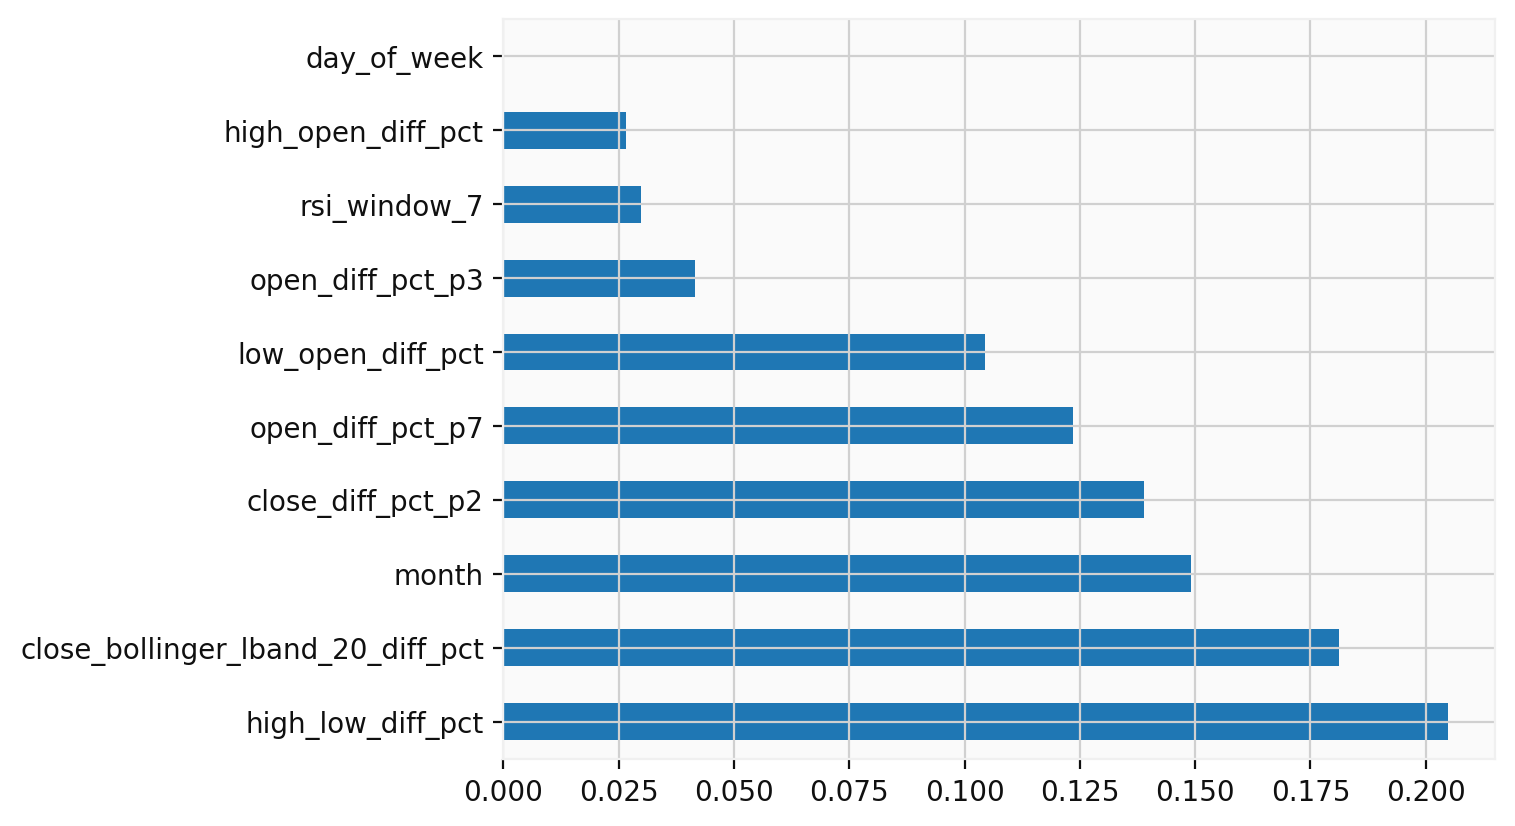

In [65]:
feat_importances = pd.Series(regressor.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [66]:
# predict
y_train_predict = regressor.predict(X_train)
y_validate_predict = regressor.predict(X_validate)
y_test_predict = regressor.predict(X_test)

In [67]:
# rmse
from sklearn.metrics import mean_squared_error
rmse_train = mean_squared_error(y_train_predict, y_train, squared=False)
rmse_validate = mean_squared_error(y_validate_predict, y_validate, squared=False)
rmse_test = mean_squared_error(y_test_predict, y_test, squared=False)

In [68]:
print(rmse_train)
print(rmse_validate)
print(rmse_test)

2.992065536442087
2.8522097951963445
4.341940027185212


## Time Series Split

In [55]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error


In [56]:
tcb_data_feature[:'2022-09-01'].columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'close_open_diff',
       'high_close_diff', 'low_close_diff', 'high_open_diff', 'low_open_diff',
       'high_low_diff', 'open_diff_pct_p1', 'open_diff_pct_p2',
       'open_diff_pct_p3', 'open_diff_pct_p4', 'open_diff_pct_p5',
       'open_diff_pct_p7', 'close_p1', 'close_p2', 'close_p3', 'close_p4',
       'close_p5', 'close_p7', 'close_diff_p1', 'close_diff_p2',
       'close_diff_p3', 'close_diff_p4', 'close_diff_p5', 'close_diff_p7',
       'close_diff_pct_p1', 'close_diff_pct_p2', 'close_diff_pct_p3',
       'close_diff_pct_p4', 'close_diff_pct_p5', 'close_diff_pct_p7',
       'volume_p1', 'volume_p2', 'volume_p3', 'volume_p4', 'volume_p5',
       'volume_p7', 'volume_diff_p1', 'volume_diff_p2', 'volume_diff_p3',
       'volume_diff_p4', 'volume_diff_p5', 'volume_diff_p7',
       'volume_diff_pct_p1', 'volume_diff_pct_p2', 'volume_diff_pct_p3',
       'volume_diff_pct_p4', 'volume_diff_pct_p5', 'volume_diff_pct_p7',
       'on_bal

In [50]:
# Prepair data
tcb_data_feature_cv = tcb_data_feature[:'2022-09-01']
X_cv = tcb_data_feature_cv[features]

y_cv = tcb_data_feature_cv['open_t3_t1_diff_pct']

In [51]:
# split
tscv = TimeSeriesSplit(n_splits=3, test_size=150)

for i, (train_index, test_index) in enumerate(tscv.split(X_cv)):
     print(f"Fold {i}:")
     print(f"  Train: index={len(train_index)}")
     print(f"  Test:  index={len(test_index)}")

Fold 0:
  Train: index=590
  Test:  index=150
Fold 1:
  Train: index=740
  Test:  index=150
Fold 2:
  Train: index=890
  Test:  index=150


In [58]:
# param search
param_search = {
              'splitter': ['best', 'random'],
              'max_depth': [4, 5, 7],
              'min_samples_split': [5, 7, 9, 11, 15],
              'min_samples_leaf': [2, 3, 5],
              'random_state': [12]
             }

gsearch = GridSearchCV(estimator=regressor, cv=tscv, n_jobs=-1, scoring='neg_root_mean_squared_error',
                        param_grid=param_search, verbose=0)
gsearch.fit(X_cv, y_cv)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=150),
             estimator=DecisionTreeRegressor(max_depth=3, min_samples_leaf=5,
                                             min_samples_split=15,
                                             random_state=12,
                                             splitter='random'),
             n_jobs=-1,
             param_grid={'max_depth': [4, 5, 7], 'min_samples_leaf': [2, 3, 5],
                         'min_samples_split': [5, 7, 9, 11, 15],
                         'random_state': [12], 'splitter': ['best', 'random']},
             scoring='neg_root_mean_squared_error')

In [59]:
pd.DataFrame(gsearch.cv_results_).sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_random_state,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
57,0.012228,0.007270,0.006145,0.004771,5,5,11,12,random,"{'max_depth': 5, 'min_samples_leaf': 5, 'min_s...",-3.878887,-2.541922,-2.859002,-3.093270,0.570398,1
13,0.016211,0.001598,0.002935,0.000168,4,3,7,12,random,"{'max_depth': 4, 'min_samples_leaf': 3, 'min_s...",-3.842238,-2.638750,-2.807498,-3.096162,0.532035,2
29,0.010167,0.003676,0.005474,0.003201,4,5,15,12,random,"{'max_depth': 4, 'min_samples_leaf': 5, 'min_s...",-3.843511,-2.657789,-2.797515,-3.099605,0.529105,3
19,0.004788,0.000173,0.002476,0.000024,4,3,15,12,random,"{'max_depth': 4, 'min_samples_leaf': 3, 'min_s...",-3.843511,-2.657789,-2.807318,-3.102873,0.527256,4
53,0.012955,0.002969,0.002665,0.000034,5,5,7,12,random,"{'max_depth': 5, 'min_samples_leaf': 5, 'min_s...",-3.908897,-2.541922,-2.859002,-3.103274,0.584184,5


In [60]:
gsearch.best_estimator_

DecisionTreeRegressor(max_depth=5, min_samples_leaf=5, min_samples_split=11,
                      random_state=12, splitter='random')

# Backtest

In [69]:
tcb_data_feature_train['open_t3_t1_diff_pct_predict'] = y_train_predict
tcb_data_feature_validate['open_t3_t1_diff_pct_predict'] = y_validate_predict
tcb_data_feature_test['open_t3_t1_diff_pct_predict'] = y_test_predict

In [70]:
# tcb_data_feature_validate

In [78]:
from backtesting import Backtest
from backtesting import Strategy
from backtesting.lib import crossover
import math

class MyStrategy(Strategy):
    thresh_hold = 0.13

    # Do as much initial computation as possible
    def init(self):
      self.indicator = self.I(lambda x: x, self.data.open_t3_t1_diff_pct_predict, name='indicator')

    def next(self):
      if self.data.open_t3_t1_diff_pct_predict > self.thresh_hold: #buy
        self.buy()
      if len(self.trades) != 0:
        for trade in self.trades:
          if self.data.index[-2] >= trade.entry_time:
            trade.close() # ban mo cua

In [75]:
bt_train = Backtest(tcb_data_feature_validate, MyStrategy, cash=20_000_000, commission=0.005)
optim = bt_train.optimize(
    thresh_hold = list(np.arange(0, 7, 0.01)),
    maximize = 'Win Rate [%]',
)

bt_train.plot()

Backtest.optimize:   0%|          | 0/3 [00:00<?, ?it/s]

Row(id='2239', ...)

In [76]:
optim

Start                     2022-01-04 09:00...
End                       2022-08-31 09:00...
Duration                    239 days 00:00:00
Exposure Time [%]                    7.317073
Equity Final [$]               21619918.14275
Equity Peak [$]                21793108.14275
Return [%]                           8.099591
Buy & Hold Return [%]              -23.477407
Return (Ann.) [%]                   12.712878
Volatility (Ann.) [%]               15.752995
Sharpe Ratio                         0.807013
Sortino Ratio                        1.340711
Calmar Ratio                         1.676148
Max. Drawdown [%]                   -7.584578
Avg. Drawdown [%]                   -4.189639
Max. Drawdown Duration       93 days 00:00:00
Avg. Drawdown Duration       49 days 00:00:00
# Trades                                    4
Win Rate [%]                            100.0
Best Trade [%]                       3.620748
Worst Trade [%]                      0.985587
Avg. Trade [%]                    

In [77]:
optim['_strategy']

<Strategy MyStrategy(thresh_hold=0.13)>

In [79]:
bt_validate = Backtest(tcb_data_feature_test, MyStrategy, cash=20_000_000, commission=0.005)
stats = bt_validate.run()
bt_validate.plot()

Row(id='3020', ...)

In [80]:
stats

Start                     2022-09-05 09:00...
End                       2023-06-20 09:00...
Duration                    288 days 00:00:00
Exposure Time [%]                   22.613065
Equity Final [$]                24974181.3655
Equity Peak [$]                  26940511.618
Return [%]                          24.870907
Buy & Hold Return [%]              -16.709845
Return (Ann.) [%]                   32.668825
Volatility (Ann.) [%]               42.131524
Sharpe Ratio                         0.775401
Sortino Ratio                        1.746602
Calmar Ratio                         3.468609
Max. Drawdown [%]                   -9.418423
Avg. Drawdown [%]                   -5.436096
Max. Drawdown Duration      197 days 00:00:00
Avg. Drawdown Duration       35 days 00:00:00
# Trades                                   19
Win Rate [%]                        52.631579
Best Trade [%]                      17.804759
Worst Trade [%]                     -8.929927
Avg. Trade [%]                    